In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import joblib
import seaborn as sns

In [18]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='R&D Spend', ylabel='Profit'>

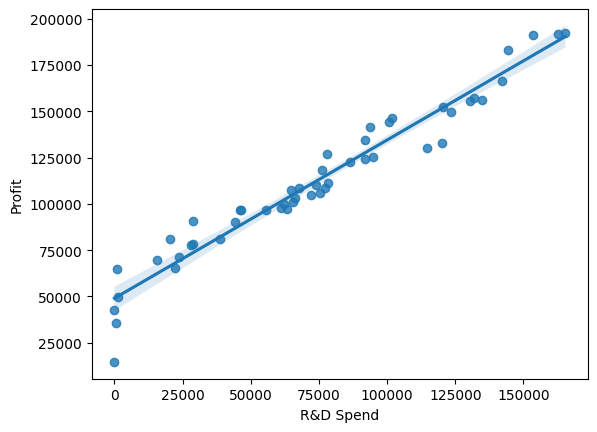

In [19]:
sns.regplot(x='R&D Spend', y='Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

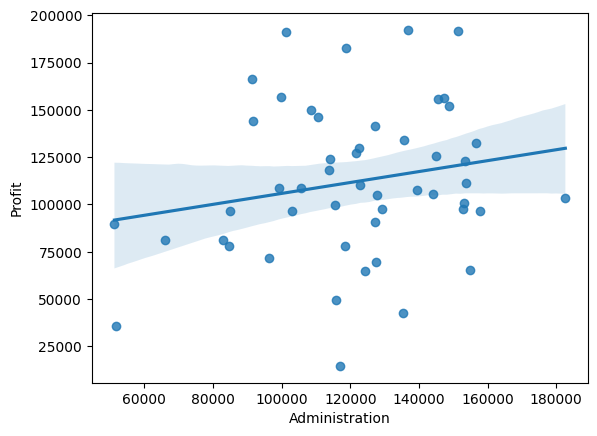

In [20]:
sns.regplot(x='Administration', y='Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

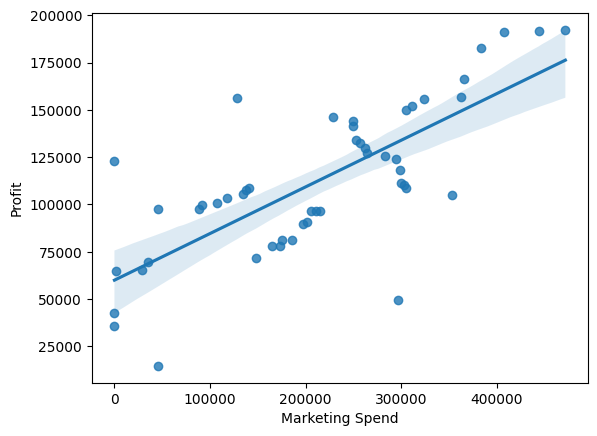

In [21]:
sns.regplot(x='Marketing Spend', y='Profit', data=df)

In [22]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
cat_cols = ['State']
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(df[cat_cols]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(cat_cols))

In [31]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)

In [32]:
#columns concatenation and dropping original columns
dummy_df = pd.concat([X_scaled_df, X_encoded_df], axis=1)

In [ ]:
regressior = 